## „ÅØ„Åò„ÇÅ09_6027„Å®Âêå„Åò

In [1]:
#„ÉÜ„É≥„Éó„É¨„Éº„Éà

# „É¢„Ç∏„É•„Éº„É´„ÅÆ„Ç§„É≥„Éù„Éº„Éà
import numpy as np  # Êï∞ÂÄ§Ë®àÁÆó„ÇÑÈÖçÂàóÊìç‰Ωú„ÇíË°å„ÅÜ„Åü„ÇÅ„ÅÆ„É©„Ç§„Éñ„É©„É™
import pandas as pd  # Ë°®ÂΩ¢Âºè„ÅÆ„Éá„Éº„Çø„ÇíÊâ±„ÅÜ„Åü„ÇÅ„ÅÆ„É©„Ç§„Éñ„É©„É™
import matplotlib.pyplot as plt  # „Éá„Éº„ÇøÂèØË¶ñÂåñ„ÅÆ„Åü„ÇÅ„ÅÆÂü∫Êú¨ÁöÑ„Å™„Ç∞„É©„ÉïÊèèÁîª„É©„Ç§„Éñ„É©„É™
import seaborn as sns  # È´òÊ©üËÉΩ„Å™Áµ±Ë®à„Ç∞„É©„Éï„ÇíÊèèÁîª„Åô„Çã„É©„Ç§„Éñ„É©„É™
import lightgbm as lgb
import optuna
import os
import datetime
from sklearn.preprocessing import LabelEncoder  # „Ç´„ÉÜ„Ç¥„É™Â§âÊï∞„ÇíÊï∞ÂÄ§„Å´Â§âÊèõ„Åô„Çã„Ç®„É≥„Ç≥„Éº„ÉÄ
from sklearn.metrics import roc_auc_score  # ROC AUC„Çπ„Ç≥„Ç¢„ÇíË®àÁÆó„Åô„ÇãË©ï‰æ°ÊåáÊ®ô
from sklearn.model_selection import KFold  # ÈÄöÂ∏∏„ÅÆKÂàÜÂâ≤‰∫§Â∑ÆÊ§úË®ºÔºà‰ªäÂõû‰ΩøÁî®Ôºâ
from lightgbm import LGBMClassifier  # LightGBM„ÅÆ„É¢„Éá„É´„ÇØ„É©„Çπ



# Ë™≠„ÅøËæº„ÇÄ„Éá„Éº„Çø„ÅåÊ†ºÁ¥ç„Åï„Çå„Åü„Éá„Ç£„É¨„ÇØ„Éà„É™„ÅÆ„Éë„ÇπÔºà‚ÄªÂøÖË¶Å„Å´Âøú„Åò„Å¶Â§âÊõ¥„ÅÆÂøÖË¶Å„Åå„ÅÇ„Çä„Åæ„ÅôÔºâ
PATH = '../data/'


X = pd.read_csv(PATH + 'train.csv')  # Â≠¶ÁøíÁî®„Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø
test = pd.read_csv(PATH + 'test.csv')    # „ÉÜ„Çπ„ÉàÁî®„Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø

c:\Users\81807\Desktop\Kaggle\GCI‚ë°(NFL Draft Prediction)\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Age„ÅÆÊ¨†ÊêçË£úÂÆå„Å®Ê¨†Êêç„Éï„É©„Ç∞„ÅÆËøΩÂä†Ôºàtrain„Å®test„ÅÆ‰∏°Êñπ„Å´ÈÅ©Áî®Ôºâ

# X„Éá„Éº„Çø
X["Age_filled"] = X["Age"].fillna(-1)
X["Age_missing"] = X["Age"].isna().astype(int)
X = X.drop(columns=["Age"])

# test„Éá„Éº„Çø
test["Age_filled"] = test["Age"].fillna(-1)
test["Age_missing"] = test["Age"].isna().astype(int)
test = test.drop(columns=["Age"])

# Êï∞ÂÄ§È†ÖÁõÆ„ÅÆ„ÅÜ„Å°Ê¨†Êêç„Åå„ÅÇ„Çã„ÇÇ„ÅÆ„Çí‰∏≠Â§ÆÂÄ§„ÅßË£úÂÆåÔºàX/testÂÖ±ÈÄöÂá¶ÁêÜÔºâ

# Ê¨†Êêç„Åå„ÅÇ„ÇãÂàó„ÇíËá™ÂãïÊ§úÂá∫„Åó„Å¶Âá¶ÁêÜ
for col in X.columns:
    if X[col].isna().sum() > 0:
        median = X[col].median()
        X[col] = X[col].fillna(median)
        test[col] = test[col].fillna(median)

In [3]:
X = X.drop(columns=["Id"])
test = test.drop(columns=["Id"])

In [4]:
# Drafted „ÇíÁõÆÁöÑÂ§âÊï∞„Å®„Åó„Å¶Âàá„ÇäÈõ¢„Åó
y = X["Drafted"]
X = X.drop(columns=["Drafted"])

# School, Player_Type, Position_Type „ÅØ‰ΩøÁî®„Åó„Å™„ÅÑÂ†¥Âêà„ÅØÊúÄÂàù„Åã„Çâdrop
X = X.drop(columns=["School", "Player_Type", "Position_Type"])
test = test.drop(columns=["School", "Player_Type", "Position_Type"])

# Position „ÅØ Target Encoding + Group Encoding „Å´„ÅÆ„Åø‰ΩøÁî®
# Label Encoding„ÅØ‰∏çË¶Å


In [5]:
# Position„ÇíTarget EncodingÔºàÂÖ®‰ΩìÂπ≥Âùá„Éô„Éº„Çπ„ÄÅ„Åì„Çå„ÅØË®±ÂÆπÁØÑÂõ≤Ôºâ
position_stats = X.copy()
position_stats["Drafted"] = y
position_target_map = position_stats.groupby("Position")["Drafted"].mean()
X["Position_encoded"] = X["Position"].map(position_target_map)
test["Position_encoded"] = test["Position"].map(position_target_map)
test["Position_encoded"] = test["Position_encoded"].fillna(X["Position_encoded"].mean())

# Position_group„Çí‰ΩúÊàêÔºà„Åì„Çå„ÅØÂêàÊ≥ï„ÉªÂÆâÂÖ®Ôºâ
def map_position_group(pos):
    if pos in ["K", "P", "LS"]:
        return "Specialist"
    elif pos in ["WR", "RB", "TE"]:
        return "OffensiveSkill"
    elif pos in ["OT", "OG", "C"]:
        return "OffensiveLine"
    elif pos in ["DE", "DT"]:
        return "DefensiveLine"
    elif pos in ["OLB", "ILB"]:
        return "Linebacker"
    elif pos in ["CB", "FS", "SS", "S", "DB"]:
        return "DefensiveBack"
    elif pos == "QB":
        return "Quarterback"
    elif pos == "FB":
        return "Fullback"
    else:
        return "Other"

X["Position_group"] = X["Position"].apply(map_position_group)
test["Position_group"] = test["Position"].apply(map_position_group)

# fold-safe„Å™ target encoding „ÇíÂÆüÊñΩ
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
X["Position_group_encoded"] = 0  # ÂàùÊúüÂåñ

for train_idx, val_idx in kf.split(X):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    group_map = X_train.assign(Drafted=y_train).groupby("Position_group")["Drafted"].mean()
    X.loc[val_idx, "Position_group_encoded"] = X.loc[val_idx, "Position_group"].map(group_map)

# test„Éá„Éº„Çø„Å´„ÅØÂÖ®‰ΩìÂπ≥Âùá„Åã„ÇâÁÆóÂá∫ÔºàÂêàÊ≥ïÔºâ
final_group_map = X.assign(Drafted=y).groupby("Position_group")["Drafted"].mean()
test["Position_group_encoded"] = test["Position_group"].map(final_group_map)
test["Position_group_encoded"] = test["Position_group_encoded"].fillna(X["Position_group_encoded"].mean())

# ‰∏çË¶Å„Å™ÊñáÂ≠óÂàóÂàó„ÅØÂâäÈô§Ôºà„Ç®„É©„ÉºÈò≤Ê≠¢Ôºâ
X = X.drop(columns=["Position", "Position_group"])
test = test.drop(columns=["Position", "Position_group"])

C:\Users\81807\AppData\Local\Temp\ipykernel_9348\3887577351.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.6        0.2739726  0.65632458 0.7109375  0.62895928 0.62895928
 0.65632458 0.62895928 0.7109375  0.71884984 0.6        0.65632458
 0.65632458 0.71884984 0.62895928 0.62895928 0.65632458 0.71884984
 0.62895928 0.65632458 0.65632458 0.62895928 0.62895928 0.65632458
 0.6        0.62895928 0.62895928 0.65632458 0.71884984 0.7109375
 0.62895928 0.7109375  0.71884984 0.62895928 0.65632458 0.62895928
 0.2739726  0.65632458 0.65632458 0.2739726  0.68376068 0.65632458
 0.62895928 0.48275862 0.68376068 0.68376068 0.71884984 0.62895928
 0.62895928 0.62895928 0.7109375  0.62895928 0.71884984 0.65632458
 0.7109375  0.62895928 0.6        0.62895928 0.7109375  0.65632458
 0.62895928 0.62895928 0.71884984 0.71884984 0.68376068 0.7109375
 0.68376068 0.65632458 0.62895928 0.62895928 0.62895928 0.62895928
 0

In [6]:
from sklearn.preprocessing import MinMaxScaler

# kg ‚Üí lbs
X["Weight_lbs"] = X["Weight"] * 2.20462
test["Weight_lbs"] = test["Weight"] * 2.20462

# Speed Score
X["SpeedScore"] = X["Weight_lbs"] * (200 / X["Sprint_40yd"]**2)
test["SpeedScore"] = test["Weight_lbs"] * (200 / test["Sprint_40yd"]**2)

# Burst Score
X["BurstScore"] = X["Vertical_Jump"] + X["Broad_Jump"]
test["BurstScore"] = test["Vertical_Jump"] + test["Broad_Jump"]

# Agility Score
X["AgilityScore"] = X["Shuttle"] + X["Agility_3cone"]
test["AgilityScore"] = test["Shuttle"] + test["Agility_3cone"]

# ASIÔºàAthletic Score IndexÔºâ
X["ASI"] = (
    0.5 * X["SpeedScore"] +
    0.3 * X["BurstScore"] +
    0.2 * X["AgilityScore"]
)
test["ASI"] = (
    0.5 * test["SpeedScore"] +
    0.3 * test["BurstScore"] +
    0.2 * test["AgilityScore"]
)

# RSA „Çπ„Ç±„Éº„É™„É≥„Ç∞ÁâπÂæ¥Èáè‰ΩúÊàê
rsa_features = ["Sprint_40yd", "Vertical_Jump", "Bench_Press_Reps", "Shuttle", "Agility_3cone"]

for col in rsa_features:
    scaler = MinMaxScaler(feature_range=(0, 10))
    if col in ["Sprint_40yd", "Shuttle", "Agility_3cone"]:
        X[f"RSA_{col}"] = 10 - scaler.fit_transform(X[[col]])
        test[f"RSA_{col}"] = 10 - scaler.transform(test[[col]])
    else:
        X[f"RSA_{col}"] = scaler.fit_transform(X[[col]])
        test[f"RSA_{col}"] = scaler.transform(test[[col]])


In [7]:
# Â≠¶Áøí„Å´‰Ωø„ÅÑ„Åü„ÅÑÂÖ®ÁâπÂæ¥Èáè„ÇíÊòéÁ§∫ÁöÑ„Å´„É™„Çπ„Éà„Ç¢„ÉÉ„Éó
all_features = [
    'Year', 'Height', 'Weight', 'Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps',
    'Broad_Jump', 'Agility_3cone', 'Shuttle',
    'Position_encoded', 'Position_group_encoded', 'Age_filled', 'Age_missing',
    'ASI',  # ‚úÖ ‰ΩøÁî®
    'RSA_Sprint_40yd', 'RSA_Vertical_Jump', 'RSA_Bench_Press_Reps', 'RSA_Shuttle', 'RSA_Agility_3cone'  # ‚úÖ ‰ΩøÁî®
]

# ÈáçË§áÂâäÈô§
all_features = list(dict.fromkeys(all_features))

print(all_features)

['Year', 'Height', 'Weight', 'Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone', 'Shuttle', 'Position_encoded', 'Position_group_encoded', 'Age_filled', 'Age_missing', 'ASI', 'RSA_Sprint_40yd', 'RSA_Vertical_Jump', 'RSA_Bench_Press_Reps', 'RSA_Shuttle', 'RSA_Agility_3cone']


In [8]:
all_features = [
    'Year', 'Height', 'Weight', 'Broad_Jump',
    'Position_encoded', 'Position_group_encoded',
    'Age_filled', 'Age_missing',
    'ASI',  # RSA„Å´Âü∫„Å•„ÅèÈáçË¶ÅÊåáÊ®ô
    'RSA_Sprint_40yd', 'RSA_Vertical_Jump', 'RSA_Bench_Press_Reps', 'RSA_Shuttle', 'RSA_Agility_3cone'
]


In [9]:
X["BMI"] = X["Weight"] / (X["Height"]/100)**2
test["BMI"] = test["Weight"] / (test["Height"]/100)**2

all_features += ["BMI"]
all_features = list(dict.fromkeys(all_features))

# all_features „Åã„Çâ Weight, Height „ÇíÂâäÈô§
all_features = [col for col in all_features if col not in ["Weight", "Height"]]

all_features = [col for col in all_features if col != "Age_missing"]


all_features = [f for f in all_features if f != "BMI"]

if "Weight" not in all_features:
    all_features.append("Weight")
if "Height" not in all_features:
    all_features.append("Height")


[LightGBM] [Info] Number of positive: 1445, number of negative: 779
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1047
[LightGBM] [Info] Number of data points in the train set: 2224, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.649730 -> initscore=0.617854
[LightGBM] [Info] Start training from score 0.617854
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

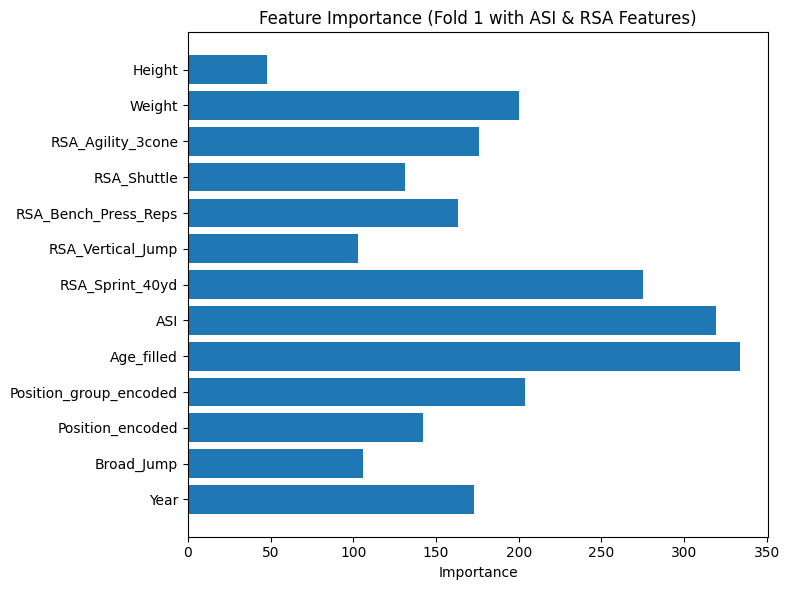

[LightGBM] [Info] Number of positive: 1448, number of negative: 777
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 2225, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.650787 -> initscore=0.622498
[LightGBM] [Info] Start training from score 0.622498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [10]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt

kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_aucs = []
val_aucs = []

X_feat = X[all_features]
y_feat = y

for fold, (train_idx, valid_idx) in enumerate(kf.split(X_feat)):
    X_train, X_valid = X_feat.iloc[train_idx], X_feat.iloc[valid_idx]
    y_train, y_valid = y_feat.iloc[train_idx], y_feat.iloc[valid_idx]
    
    model = LGBMClassifier(
        max_depth=4,
        num_leaves=10,
        min_child_samples=50,
        reg_alpha=5.0,
        reg_lambda=5.0,
        learning_rate=0.03,
        n_estimators=700,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric='auc',
        callbacks=[
            lgb.early_stopping(stopping_rounds=30),
            lgb.log_evaluation(0)
        ]
    )

    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_valid_pred = model.predict_proba(X_valid)[:, 1]
    
    train_auc = roc_auc_score(y_train, y_train_pred)
    val_auc = roc_auc_score(y_valid, y_valid_pred)
    
    train_aucs.append(train_auc)
    val_aucs.append(val_auc)
    
    print(f"‚úÖ Fold {fold + 1} - Train AUC: {train_auc:.4f}, Validation AUC: {val_auc:.4f}")

    if fold == 0:
        importances = model.feature_importances_
        feature_names = X_feat.columns
        plt.figure(figsize=(8, 6))
        plt.barh(feature_names, importances)
        plt.title("Feature Importance (Fold 1 with ASI & RSA Features)")
        plt.xlabel("Importance")
        plt.tight_layout()
        plt.show()

print(f"\n‚úÖ Average Train AUC: {np.mean(train_aucs):.4f}")
print(f"‚úÖ Average Validation AUC: {np.mean(val_aucs):.4f}")

In [11]:
# üö© School Âàó„ÇíÂæ©ÂÖÉ„Åô„ÇãÔºàÂâäÈô§Ê∏à„ÅÆÂ†¥ÂêàÔºâ
if "School" not in X.columns:
    df_raw = pd.read_csv("../data/train.csv")
    X["School"] = df_raw["School"]

if "School" not in test.columns:
    test_raw = pd.read_csv("../data/test.csv")
    test["School"] = test_raw["School"]

print("‚úÖ School Âàó„ÇíÂæ©ÂÖÉÂÆå‰∫Ü")


‚úÖ School Âàó„ÇíÂæ©ÂÖÉÂÆå‰∫Ü


In [12]:
# =====================================================
# üéØ School ÁâπÂæ¥Èáè„Ç®„É≥„Ç∏„Éã„Ç¢„É™„É≥„Ç∞ÔºàÂêàÊ≥ï„Éâ„É°„Ç§„É≥Áü•Ë≠òÊ¥ªÁî®Ôºâ
# =====================================================

import pandas as pd
from sklearn.model_selection import KFold

# 1Ô∏è‚É£ Drafted Êï∞„ÉªÁéá„Çí school „Åî„Å®„Å´ÈõÜË®à
school_stats = X.copy()
school_stats["Drafted"] = y
school_agg = school_stats.groupby("School")["Drafted"].agg(["sum", "count"])
school_agg["Drafted_Rate"] = school_agg["sum"] / school_agg["count"]

# School_Drafted_Count („Çπ„Ç´„Ç¶„ÉàÊ≥®ÁõÆÂ∫¶„ÅÆ proxy)
school_drafted_count = school_agg["sum"]

# School_Drafted_Rate
school_drafted_rate = school_agg["Drafted_Rate"]

# 2Ô∏è‚É£ Â∏∏ÈÄ£Ê†°„Éï„É©„Ç∞‰ΩúÊàêÔºàDrafted Êï∞‰∏ä‰Ωç 20 Ê†°„ÇíÂ∏∏ÈÄ£Ê†°„Å®„Åô„Çã‰æãÔºâ
top_n = 20
top_schools = school_drafted_count.sort_values(ascending=False).head(top_n).index.tolist()

X["School_Top"] = X["School"].isin(top_schools).astype(int)
test["School_Top"] = test["School"].isin(top_schools).astype(int)

# 3Ô∏è‚É£ School_Drafted_Count „Çí„Éû„ÉÉ„Éî„É≥„Ç∞
X["School_Drafted_Count"] = X["School"].map(school_drafted_count)
test["School_Drafted_Count"] = test["School"].map(school_drafted_count)
test["School_Drafted_Count"] = test["School_Drafted_Count"].fillna(0)  # Êú™Áü•Ê†°„ÅØ 0 Êâ±„ÅÑ

# 4Ô∏è‚É£ fold-safe Target Encoding (School_Drafted_Rate)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
X["School_Drafted_Rate_TE"] = 0.0  # float„ÅßÂàùÊúüÂåñ

for train_idx, val_idx in kf.split(X):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    rate_map = X_train.assign(Drafted=y_train).groupby("School")["Drafted"].mean()
    X.loc[val_idx, "School_Drafted_Rate_TE"] = X.loc[val_idx, "School"].map(rate_map)

# test „Å´„ÅØÂÖ®‰Ωì„ÅÆ rate_map „Åß‰ªò‰∏é
final_rate_map = X.assign(Drafted=y).groupby("School")["Drafted"].mean()
test["School_Drafted_Rate_TE"] = test["School"].map(final_rate_map)
test["School_Drafted_Rate_TE"] = test["School_Drafted_Rate_TE"].fillna(y.mean())  # Êú™Áü•Ê†°„ÅØÂπ≥Âùá„ÅßË£úÂÆå

# 5Ô∏è‚É£ ‰∏çË¶Å„Å™ÂÖÉ„ÅÆ School Âàó„ÅØÂâäÈô§
X = X.drop(columns=["School"])
test = test.drop(columns=["School"])

# 6Ô∏è‚É£ ËøΩÂä†ÁâπÂæ¥Èáè„É™„Çπ„Éà„Å´Âä†„Åà„ÇãÂ†¥Âêà
new_school_features = ["School_Top", "School_Drafted_Count", "School_Drafted_Rate_TE"]
for col in new_school_features:
    if col not in all_features:
        all_features.append(col)

print(f"‚úÖ School ÁâπÂæ¥Èáè„Ç®„É≥„Ç∏„Éã„Ç¢„É™„É≥„Ç∞ÂÆå‰∫Ü: {new_school_features}")


‚úÖ School ÁâπÂæ¥Èáè„Ç®„É≥„Ç∏„Éã„Ç¢„É™„É≥„Ç∞ÂÆå‰∫Ü: ['School_Top', 'School_Drafted_Count', 'School_Drafted_Rate_TE']


In [13]:
all_features += ['School_Top', 'School_Drafted_Count', 'School_Drafted_Rate_TE']
all_features = list(dict.fromkeys(all_features))  # ÈáçË§áÊéíÈô§


In [14]:
# ÁâπÂæ¥ÈáèËøΩÂä†
all_features += ['School_Top', 'School_Drafted_Count', 'School_Drafted_Rate_TE']
all_features = list(dict.fromkeys(all_features))

# Â≠¶Áøí„Éª„Çπ„Ç≥„Ç¢Á¢∫Ë™ç„Å∏ÈÄ≤„ÇÄ


In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
import numpy as np

# ‚úÖ 08„É¢„Éá„É´„Éë„É©„É°„Éº„ÇøÂõ∫ÂÆö
model = LGBMClassifier(
    max_depth=6,
    num_leaves=10,
    min_child_samples=38,
    reg_alpha=8.18,
    reg_lambda=8.07,
    learning_rate=0.0442,
    n_estimators=1000,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_aucs = []
val_aucs = []

for fold, (train_idx, valid_idx) in enumerate(kf.split(X)):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric='auc',
        callbacks=[
            lgb.early_stopping(stopping_rounds=30),
            lgb.log_evaluation(0)
        ]
    )

    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_valid_pred = model.predict_proba(X_valid)[:, 1]

    train_auc = roc_auc_score(y_train, y_train_pred)
    val_auc = roc_auc_score(y_valid, y_valid_pred)

    train_aucs.append(train_auc)
    val_aucs.append(val_auc)

    print(f"‚úÖ Fold {fold + 1} - Train AUC: {train_auc:.4f}, Validation AUC: {val_auc:.4f}")

print(f"\n‚úÖ Average Train AUC: {np.mean(train_aucs):.4f}")
print(f"‚úÖ Average Validation AUC: {np.mean(val_aucs):.4f}")


[LightGBM] [Info] Number of positive: 1445, number of negative: 779
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000580 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2731
[LightGBM] [Info] Number of data points in the train set: 2224, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.649730 -> initscore=0.617854
[LightGBM] [Info] Start training from score 0.617854
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

# „Åì„Åì„Åæ„Åß09_6027„Å®Âêå„Åò

## 13„Åß„ÇÑ„Çã„Åì„Å®

‚úÖ Test_Participation_Count „Çí‰ΩúÊàêÔºàEDAÊÆµÈöé„ÅßÂàÜÂ∏ÉÂèØË¶ñÂåñÔºâ

‚úÖ Age_missing „ÇíÂæ©Ê¥ª

‚úÖ Premium_Position „ÇíËøΩÂä†

### ‚úÖ Test_Participation_Count „Çí‰ΩúÊàêÔºàEDAÊÆµÈöé„ÅßÂàÜÂ∏ÉÂèØË¶ñÂåñÔºâ

In [16]:
# Sprint_40yd, Vertical_Jump, Bench_Press_Reps, Broad_Jump, Agility_3cone, Shuttle „ÅÆÊ¨†Êêç„Åå„Å™„ÅÑÂàó„Çí„Ç´„Ç¶„É≥„Éà
test_cols = ["Sprint_40yd", "Vertical_Jump", "Bench_Press_Reps", "Broad_Jump", "Agility_3cone", "Shuttle"]
X["Test_Participation_Count"] = X[test_cols].notna().sum(axis=1)
test["Test_Participation_Count"] = test[test_cols].notna().sum(axis=1)


### ‚úÖ Age_missing „ÇíÂæ©Ê¥ª

In [17]:
# Age_filled = -1 „Åß„ÅÇ„Çã„ÇÇ„ÅÆ„ÇíÊ¨†Êêç„Éï„É©„Ç∞1„ÄÅ„Åù„Çå‰ª•Â§ñ0
X["Age_missing"] = (X["Age_filled"] == -1).astype(int)
test["Age_missing"] = (test["Age_filled"] == -1).astype(int)


### ‚úÖ Premium_Position „ÇíËøΩÂä†

In [18]:
premium_positions = ["QB", "WR", "OT", "DE", "CB"]

if "Position" in X.columns:
    X["Premium_Position"] = X["Position"].isin(premium_positions).astype(int)
else:
    X["Premium_Position"] = 0  # Êó¢„Å´ÂâäÈô§Ê∏à„ÅÆÂ†¥Âêà„ÅØ0Âüã„ÇÅ

if "Position" in test.columns:
    test["Premium_Position"] = test["Position"].isin(premium_positions).astype(int)
else:
    test["Premium_Position"] = 0



In [19]:
for col in ["Test_Participation_Count", "Age_missing", "Premium_Position"]:
    if col not in all_features:
        all_features.append(col)


[LightGBM] [Info] Number of positive: 1445, number of negative: 779
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1975
[LightGBM] [Info] Number of data points in the train set: 2224, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.649730 -> initscore=0.617854
[LightGBM] [Info] Start training from score 0.617854
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.861641	valid_0's binary_logloss: 0.399889
‚úÖ Fold 1 - Train AUC: 0.9256, Validation AUC: 0.8616


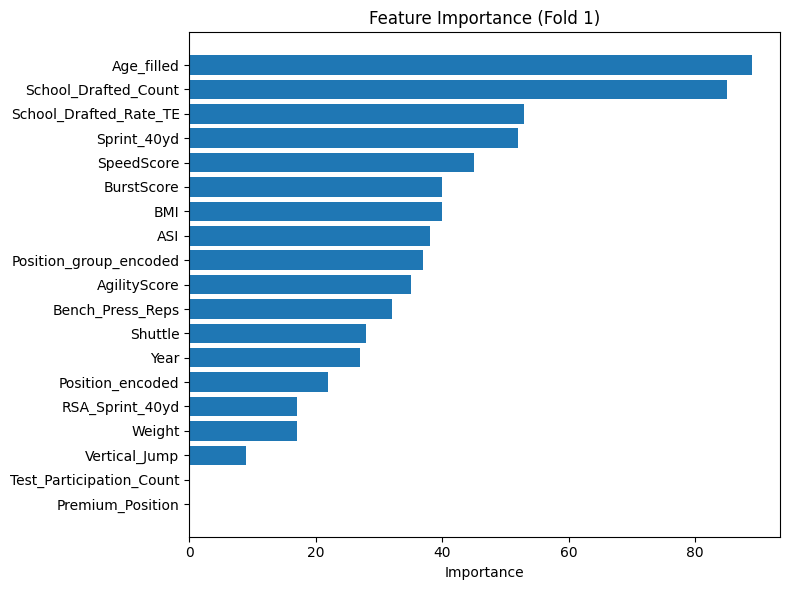

[LightGBM] [Info] Number of positive: 1448, number of negative: 777
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1981
[LightGBM] [Info] Number of data points in the train set: 2225, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.650787 -> initscore=0.622498
[LightGBM] [Info] Start training from score 0.622498
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[81]	valid_0's auc: 0.857403	valid_0's binary_logloss: 0.411912
‚úÖ Fold 2 - Train AUC: 0.9343, Validation AUC: 0.8574
[LightGBM] [Info] Number of positive: 1442, number of negative: 783
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1990
[LightGBM] [Info] Number of data 

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import numpy as np

# ËøΩÂä†ÂâäÈô§„Ç´„É©„É†
drop_cols_additional = ["RSA_Vertical_Jump", "Broad_Jump", "Height", "Agility_3cone"]

# „Åô„Åß„Å´ÂâäÈô§Ê∏à„ÅÆ„Ç´„É©„É†ÔºãËøΩÂä†„Ç´„É©„É†
drop_cols_total = [
    "School_Top", "RSA_Agility_3cone", "RSA_Shuttle",
    "RSA_Bench_Press_Reps", "Weight_lbs", "Age_missing"
] + drop_cols_additional

# „Ç´„É©„É†ÂâäÈô§
X_reduced2 = X.drop(columns=[col for col in drop_cols_total if col in X.columns])

# „É¢„Éá„É´ÂÆöÁæ©Ôºà„Éë„É©„É°„Éº„Çø„Åù„ÅÆ„Åæ„ÅæÔºâ
model = LGBMClassifier(
    max_depth=8,
    num_leaves=10,
    min_child_samples=10,
    reg_alpha=0.0415,
    reg_lambda=0.2428,
    learning_rate=0.0726,
    n_estimators=1000,
    subsample=0.6898,
    colsample_bytree=0.7463,
    random_state=42
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_aucs = []
val_aucs = []

for fold, (train_idx, valid_idx) in enumerate(kf.split(X_reduced2)):
    X_train, X_valid = X_reduced2.iloc[train_idx], X_reduced2.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric='auc',
        callbacks=[
            lgb.early_stopping(stopping_rounds=30),
            lgb.log_evaluation(0)
        ]
    )

    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_valid_pred = model.predict_proba(X_valid)[:, 1]

    train_auc = roc_auc_score(y_train, y_train_pred)
    val_auc = roc_auc_score(y_valid, y_valid_pred)

    train_aucs.append(train_auc)
    val_aucs.append(val_auc)

    print(f"‚úÖ Fold {fold + 1} - Train AUC: {train_auc:.4f}, Validation AUC: {val_auc:.4f}")

    # Fold 1 „ÅÆ„Åø Feature Importance ÂèØË¶ñÂåñ
    if fold == 0:
        importances = model.feature_importances_
        feature_names = X_train.columns

        sorted_idx = np.argsort(importances)
        plt.figure(figsize=(8, 6))
        plt.barh(range(len(importances)), importances[sorted_idx])
        plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_idx])
        plt.title("Feature Importance (Fold 1)")
        plt.xlabel("Importance")
        plt.tight_layout()
        plt.show()

print(f"\n‚úÖ Average Train AUC: {np.mean(train_aucs):.4f}")
print(f"‚úÖ Average Validation AUC: {np.mean(val_aucs):.4f}")


[LightGBM] [Info] Number of positive: 1445, number of negative: 779
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1637
[LightGBM] [Info] Number of data points in the train set: 2224, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.649730 -> initscore=0.617854
[LightGBM] [Info] Start training from score 0.617854
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[64]	valid_0's auc: 0.86515	valid_0's binary_logloss: 0.401981
‚úÖ Fold 1 - Train AUC: 0.9206, Validation AUC: 0.8651


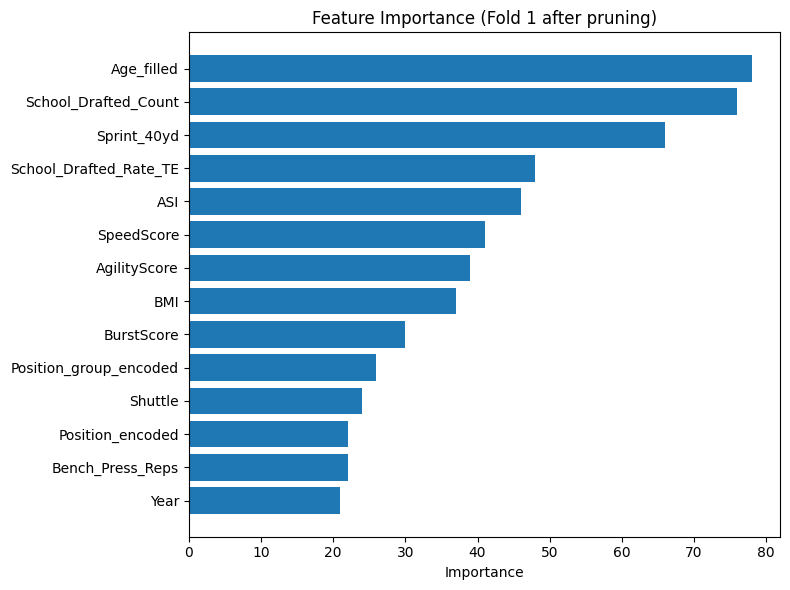

[LightGBM] [Info] Number of positive: 1448, number of negative: 777
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1644
[LightGBM] [Info] Number of data points in the train set: 2225, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.650787 -> initscore=0.622498
[LightGBM] [Info] Start training from score 0.622498
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[61]	valid_0's auc: 0.857662	valid_0's binary_logloss: 0.415921
‚úÖ Fold 2 - Train AUC: 0.9206, Validation AUC: 0.8577
[LightGBM] [Info] Number of positive: 1442, number of negative: 783
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1650
[LightGBM] [Info] Number of data 

In [21]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import numpy as np

# üö© ÂâäÈô§ÂØæË±°„Ç´„É©„É†
drop_cols_recheck = [
    "Premium_Position",
    "Test_Participation_Count",
    "RSA_Sprint_40yd",
    "Weight",
    "Vertical_Jump"
]

# „Ç´„É©„É†ÂâäÈô§
X_reduced3 = X_reduced2.drop(columns=[col for col in drop_cols_recheck if col in X_reduced2.columns])

# „É¢„Éá„É´ÂÆöÁæ©Ôºà„Éë„É©„É°„Éº„Çø„Åù„ÅÆ„Åæ„ÅæÔºâ
model = LGBMClassifier(
    max_depth=8,
    num_leaves=10,
    min_child_samples=10,
    reg_alpha=0.0415,
    reg_lambda=0.2428,
    learning_rate=0.0726,
    n_estimators=1000,
    subsample=0.6898,
    colsample_bytree=0.7463,
    random_state=42
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_aucs = []
val_aucs = []

for fold, (train_idx, valid_idx) in enumerate(kf.split(X_reduced3)):
    X_train, X_valid = X_reduced3.iloc[train_idx], X_reduced3.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric='auc',
        callbacks=[
            lgb.early_stopping(stopping_rounds=30),
            lgb.log_evaluation(0)
        ]
    )

    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_valid_pred = model.predict_proba(X_valid)[:, 1]

    train_auc = roc_auc_score(y_train, y_train_pred)
    val_auc = roc_auc_score(y_valid, y_valid_pred)

    train_aucs.append(train_auc)
    val_aucs.append(val_auc)

    print(f"‚úÖ Fold {fold + 1} - Train AUC: {train_auc:.4f}, Validation AUC: {val_auc:.4f}")

    # Fold 1„ÅÆ„ÅøFeature ImportanceÂèØË¶ñÂåñ
    if fold == 0:
        importances = model.feature_importances_
        feature_names = X_train.columns

        sorted_idx = np.argsort(importances)
        plt.figure(figsize=(8, 6))
        plt.barh(range(len(importances)), importances[sorted_idx])
        plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_idx])
        plt.title("Feature Importance (Fold 1 after pruning)")
        plt.xlabel("Importance")
        plt.tight_layout()
        plt.show()

print(f"\n‚úÖ Average Train AUC: {np.mean(train_aucs):.4f}")
print(f"‚úÖ Average Validation AUC: {np.mean(val_aucs):.4f}")


[LightGBM] [Info] Number of positive: 1803, number of negative: 978
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1690
[LightGBM] [Info] Number of data points in the train set: 2781, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.648328 -> initscore=0.611698
[LightGBM] [Info] Start training from score 0.611698


c:\Users\81807\Desktop\Kaggle\GCI‚ë°(NFL Draft Prediction)\.venv\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


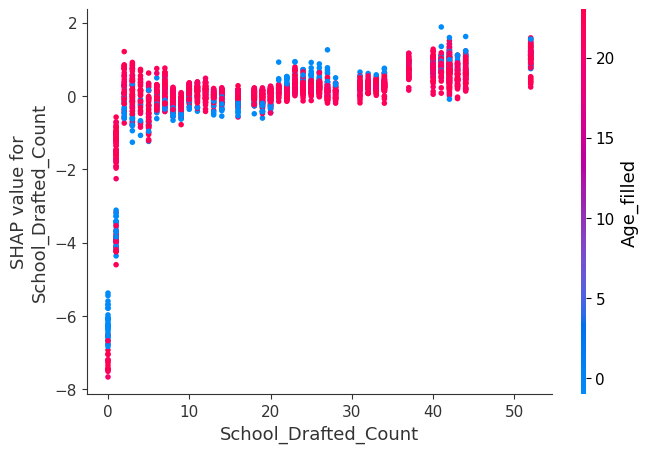

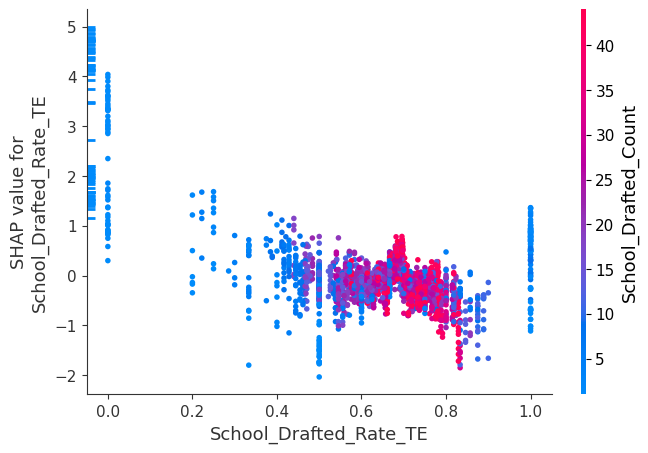

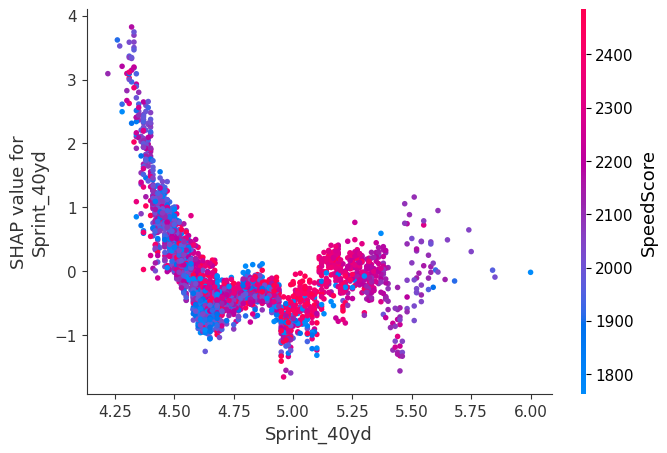

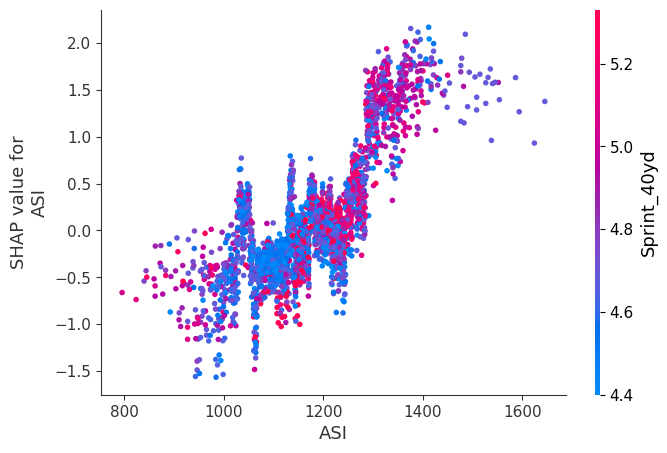

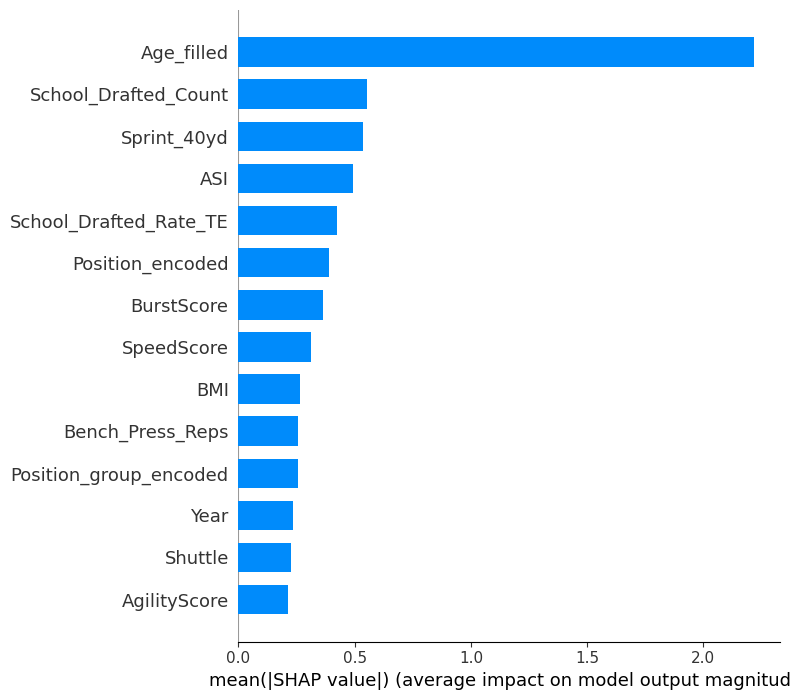

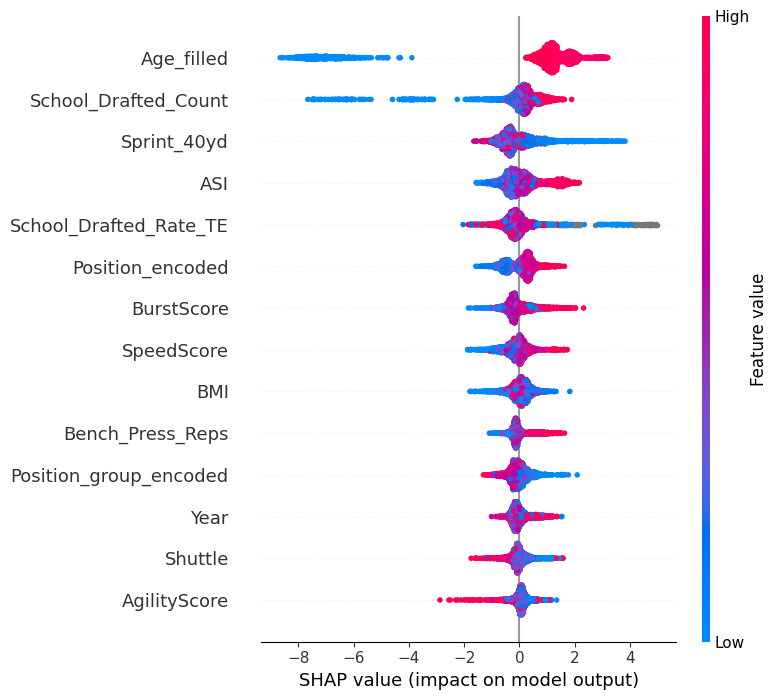

‚úÖ SHAPËß£ÊûêÂÆå‰∫ÜÔºö‰∏äË®ò„ÅÆ„Ç∞„É©„Éï„ÅßÂØÑ‰∏éÊñπÂêë„ÉªÈñæÂÄ§ÁâπÊÄß„ÇíÁ¢∫Ë™ç„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ


In [22]:
import shap

# üö© LightGBM + SHAPËß£Êûê

# „É¢„Éá„É´ÂÜçÂ≠¶ÁøíÔºàFold 0„ÅÆ„É¢„Éá„É´„Çí„Åù„ÅÆ„Åæ„ÅæÂÜçÂà©Áî®Ôºâ
model.fit(X_reduced3, y)

# SHAPÂÄ§Ë®àÁÆó
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_reduced3)

# üö© ÈáçË¶ÅÁâπÂæ¥Èáè4„Å§„ÅÆ SHAP Dependence Plot

target_features = ["School_Drafted_Count", "School_Drafted_Rate_TE", "Sprint_40yd", "ASI"]

for feature in target_features:
    if feature in X_reduced3.columns:
        shap.dependence_plot(feature, shap_values, X_reduced3, show=True)
    else:
        print(f"‚ö†Ô∏è {feature} „ÅØ X_reduced3 „Å´Â≠òÂú®„Åó„Åæ„Åõ„Çì")

# üö© ÂÖ®‰Ωì SHAP Summary PlotÔºà„Éê„ÉºÂΩ¢ÂºèÔºâ
shap.summary_plot(shap_values, X_reduced3, plot_type="bar", max_display=20)

# üö© ÂÖ®‰Ωì SHAP Summary PlotÔºà„Éâ„ÉÉ„ÉàÂΩ¢ÂºèÔºâ
shap.summary_plot(shap_values, X_reduced3, max_display=20)

print("‚úÖ SHAPËß£ÊûêÂÆå‰∫ÜÔºö‰∏äË®ò„ÅÆ„Ç∞„É©„Éï„ÅßÂØÑ‰∏éÊñπÂêë„ÉªÈñæÂÄ§ÁâπÊÄß„ÇíÁ¢∫Ë™ç„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ")


[LightGBM] [Info] Number of positive: 1445, number of negative: 779
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2303
[LightGBM] [Info] Number of data points in the train set: 2224, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.649730 -> initscore=0.617854
[LightGBM] [Info] Start training from score 0.617854
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.859633	valid_0's binary_logloss: 0.420451
‚úÖ Fold 1 - Train AUC: 0.8935, Validation AUC: 0.8596


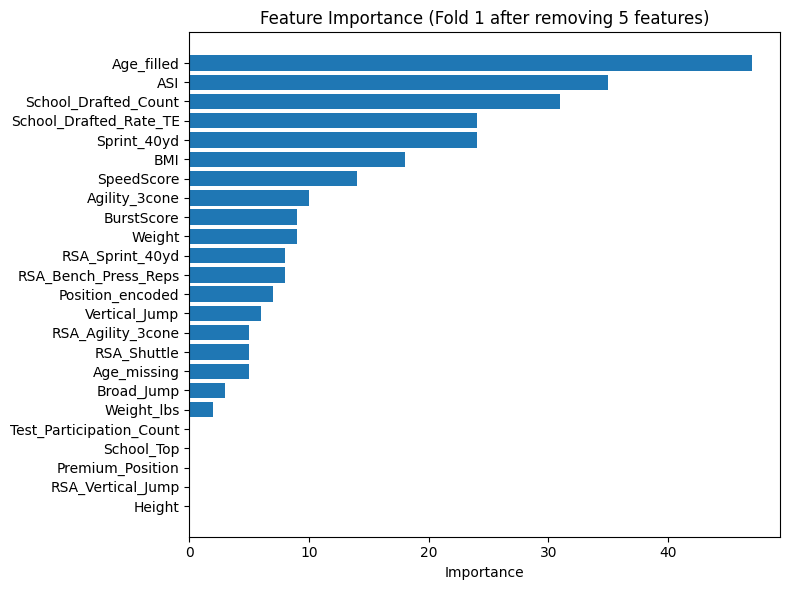

[LightGBM] [Info] Number of positive: 1448, number of negative: 777
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2301
[LightGBM] [Info] Number of data points in the train set: 2225, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.650787 -> initscore=0.622498
[LightGBM] [Info] Start training from score 0.622498
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.870605	valid_0's binary_logloss: 0.403876
‚úÖ Fold 2 - Train AUC: 0.9250, Validation AUC: 0.8706
[LightGBM] [Info] Number of positive: 1442, number of negative: 783
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2314
[LightGBM] [Info] Number of data 

In [23]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import numpy as np

# üö© ÂâäÈô§ÂØæË±°„Ç´„É©„É†
drop_cols_final = [
    "Shuttle",
    "AgilityScore",
    "Year",
    "Position_group_encoded",
    "Bench_Press_Reps"
]

# ÊúÄÊñ∞X„Åã„ÇâÂÜçÂâäÈô§ÈÅ©Áî®
X_reduced_final = X.drop(columns=[col for col in drop_cols_final if col in X.columns])

# „É¢„Éá„É´ÂÆöÁæ©Ôºà„Éë„É©„É°„Éº„Çø„ÅØ„Åù„ÅÆ„Åæ„ÅæÔºâ
model = LGBMClassifier(
    max_depth=8,
    num_leaves=10,
    min_child_samples=10,
    reg_alpha=0.0415,
    reg_lambda=0.2428,
    learning_rate=0.0726,
    n_estimators=1000,
    subsample=0.6898,
    colsample_bytree=0.7463,
    random_state=42
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_aucs = []
val_aucs = []

for fold, (train_idx, valid_idx) in enumerate(kf.split(X_reduced_final)):
    X_train, X_valid = X_reduced_final.iloc[train_idx], X_reduced_final.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric='auc',
        callbacks=[
            lgb.early_stopping(stopping_rounds=30),
            lgb.log_evaluation(0)
        ]
    )

    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_valid_pred = model.predict_proba(X_valid)[:, 1]

    train_auc = roc_auc_score(y_train, y_train_pred)
    val_auc = roc_auc_score(y_valid, y_valid_pred)

    train_aucs.append(train_auc)
    val_aucs.append(val_auc)

    print(f"‚úÖ Fold {fold + 1} - Train AUC: {train_auc:.4f}, Validation AUC: {val_auc:.4f}")

    # Fold 1„ÅÆ„ÅøFeature ImportanceÂèØË¶ñÂåñ
    if fold == 0:
        importances = model.feature_importances_
        feature_names = X_train.columns

        sorted_idx = np.argsort(importances)
        plt.figure(figsize=(8, 6))
        plt.barh(range(len(importances)), importances[sorted_idx])
        plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_idx])
        plt.title("Feature Importance (Fold 1 after removing 5 features)")
        plt.xlabel("Importance")
        plt.tight_layout()
        plt.show()

print(f"\n‚úÖ Average Train AUC: {np.mean(train_aucs):.4f}")
print(f"‚úÖ Average Validation AUC: {np.mean(val_aucs):.4f}")


## üö© ÂâäÈô§ÂÄôË£úÔºàÈáçË¶ÅÂ∫¶„Åª„Åº„Çº„É≠Ôºâ
Test_Participation_Count

School_Top

Premium_Position

RSA_Vertical_Jump

Height



[LightGBM] [Info] Number of positive: 1445, number of negative: 779
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2237
[LightGBM] [Info] Number of data points in the train set: 2224, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.649730 -> initscore=0.617854
[LightGBM] [Info] Start training from score 0.617854
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[112]	valid_0's auc: 0.86202	valid_0's binary_logloss: 0.40045
‚úÖ Fold 1 - Train AUC: 0.9448, Validation AUC: 0.8620


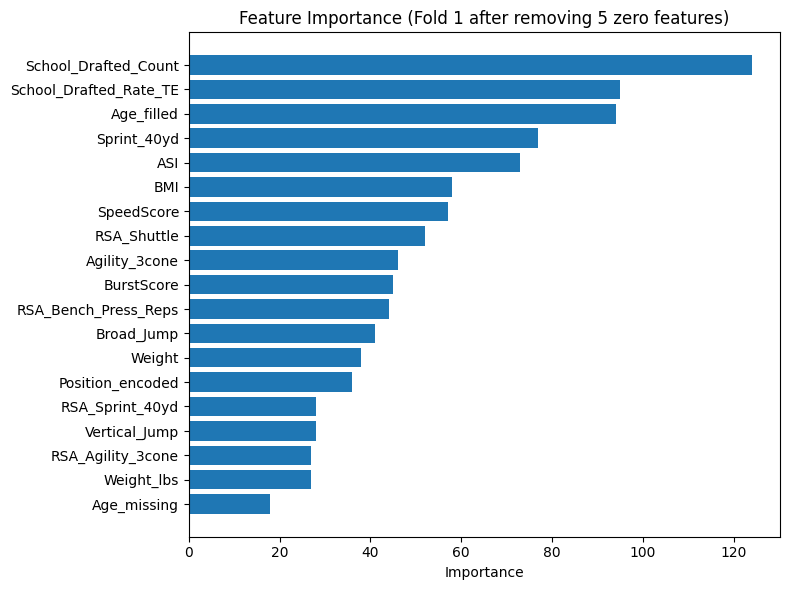

[LightGBM] [Info] Number of positive: 1448, number of negative: 777
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2234
[LightGBM] [Info] Number of data points in the train set: 2225, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.650787 -> initscore=0.622498
[LightGBM] [Info] Start training from score 0.622498
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.863128	valid_0's binary_logloss: 0.408795
‚úÖ Fold 2 - Train AUC: 0.9213, Validation AUC: 0.8631
[LightGBM] [Info] Number of positive: 1442, number of negative: 783
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2246
[LightGBM] [Info] Number of data 

In [24]:
# üö© ËøΩÂä†ÂâäÈô§ÂØæË±°„Ç´„É©„É†
drop_cols_next = [
    "Test_Participation_Count",
    "School_Top",
    "Premium_Position",
    "RSA_Vertical_Jump",
    "Height"
]

# ÊúÄÊñ∞ÂâäÈô§ÈÅ©Áî®
X_reduced_next = X_reduced_final.drop(columns=[col for col in drop_cols_next if col in X_reduced_final.columns])

# Â≠¶Áøí„É´„Éº„Éó„ÅØÂêå„Åò„Éë„É©„É°„Éº„Çø„ÅßÂÆüË°å
kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_aucs = []
val_aucs = []

for fold, (train_idx, valid_idx) in enumerate(kf.split(X_reduced_next)):
    X_train, X_valid = X_reduced_next.iloc[train_idx], X_reduced_next.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric='auc',
        callbacks=[
            lgb.early_stopping(stopping_rounds=30),
            lgb.log_evaluation(0)
        ]
    )

    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_valid_pred = model.predict_proba(X_valid)[:, 1]

    train_auc = roc_auc_score(y_train, y_train_pred)
    val_auc = roc_auc_score(y_valid, y_valid_pred)

    train_aucs.append(train_auc)
    val_aucs.append(val_auc)

    print(f"‚úÖ Fold {fold + 1} - Train AUC: {train_auc:.4f}, Validation AUC: {val_auc:.4f}")

    if fold == 0:
        importances = model.feature_importances_
        feature_names = X_train.columns
        sorted_idx = np.argsort(importances)
        plt.figure(figsize=(8, 6))
        plt.barh(range(len(importances)), importances[sorted_idx])
        plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_idx])
        plt.title("Feature Importance (Fold 1 after removing 5 zero features)")
        plt.xlabel("Importance")
        plt.tight_layout()
        plt.show()

print(f"\n‚úÖ Average Train AUC: {np.mean(train_aucs):.4f}")
print(f"‚úÖ Average Validation AUC: {np.mean(val_aucs):.4f}")


In [25]:
# üîÑ ÊèêÂá∫Áî®„Éï„Ç°„Ç§„É´„ÅÆ‰ΩúÊàêÂá¶ÁêÜÔºàLightGBM„É¢„Éá„É´„Å´Âü∫„Å•„Åè‰∫àÊ∏¨Ôºâ

# original_test „ÇíÂÜçË™≠„ÅøËæº„Åø„Åó„Å¶ Id „ÇíÂæ©ÂÖÉ
original_test = pd.read_csv(PATH + "test.csv")

# ÊèêÂá∫Áî®ÁâπÂæ¥ÈáèÂàó„ÅØ X_reduced2.columns „ÅßÁ¢∫ÂÆö„Åï„Åõ„Çã
feature_cols = X_reduced_next.columns.tolist()

# test „Å´Â≠òÂú®„Åó„Å™„ÅÑÂàó„Åå„ÅÇ„Çå„Å∞Âüã„ÇÅ„ÇãÔºàÂÆâÂÖ®Ôºâ
missing_cols = set(feature_cols) - set(test.columns)
for col in missing_cols:
    test[col] = 0

# ÂàóÈ†Ü„ÇíÊèÉ„Åà„Çã
X_test = test[feature_cols]

# ‰∫àÊ∏¨
y_pred = model.predict_proba(X_test)[:, 1]


# ÊèêÂá∫Áî®DataFrame„Çí‰ΩúÊàê
submission = pd.DataFrame({
    "Id": original_test["Id"],
    "Drafted": y_pred
})

# ‰øùÂ≠ò„Éá„Ç£„É¨„ÇØ„Éà„É™„Çí„Éó„É≠„Ç∏„Çß„ÇØ„Éà„É´„Éº„Éà„Å´‰ΩúÊàê
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
save_dir = os.path.join(root_dir, "submissions")
os.makedirs(save_dir, exist_ok=True)

import os
import datetime
import re  # ‚Üê „Åì„Çå„ÇíÂøò„Çå„Åö„Å´ÔºÅ

try:
    import ipynbname
    notebook_path = ipynbname.path()
    notebook_name = notebook_path.stem  # „Éï„Ç°„Ç§„É´ÂêçÔºàÊã°ÂºµÂ≠ê„Å™„ÅóÔºâ
except:
    notebook_name = "13_0630_notebook()"   # fallback

# Êï∞Â≠ó„Å®„Ç¢„É≥„ÉÄ„Éº„Çπ„Ç≥„Ç¢ÈÉ®ÂàÜ„Å†„ÅëÊäΩÂá∫Ôºà‰æãÔºö06_0627Ôºâ
match = re.search(r"\d{2}_\d{4}", notebook_name)
tag = match.group() if match else notebook_name

filename = f"submission_{tag}.csv"


# ÊèêÂá∫„Éï„Ç°„Ç§„É´Âêç„ÇíÁµÑ„ÅøÁ´ã„Å¶„Çã
filename = f"submission_{tag}.csv"
save_path = os.path.join(save_dir, filename)

# Êõ∏„ÅçÂá∫„Åó
submission.to_csv(save_path, index=False)
print(f"‚úÖ ÊèêÂá∫„Éï„Ç°„Ç§„É´„Çí‰øùÂ≠ò„Åó„Åæ„Åó„Åü: {save_path}")

‚úÖ ÊèêÂá∫„Éï„Ç°„Ç§„É´„Çí‰øùÂ≠ò„Åó„Åæ„Åó„Åü: c:\Users\81807\Desktop\Kaggle\GCI‚ë°(NFL Draft Prediction)\submissions\submission_13_0630.csv
